# Алгоритмы анализа данных

## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

### Задание 1

Реализовать оптимизацию методом градиентного спуска для x^2(np.sin(0,5_x)^2+1). Какие параметры шага и количества итераций оптимальны? При каких значениях шага оптимизиция не выходит из локальных минимумов? Подробные условия смотрите в .ipynb файле, приложенном к материалам.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

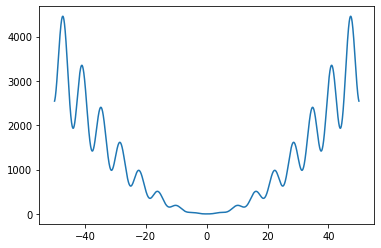

In [2]:
x = np.linspace(-50, 50, 5000)
def func1(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
plt.plot(x, func1(x))
plt.show()

In [3]:
def grad1(_x): return 2*_x*(np.sin(0.5*_x)**2+1)+_x**2*np.sin(0.5*_x)*np.cos(0.5*_x)

In [4]:
def calculate_grad(func, x0, delta=0.0001): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.0001): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [5]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad 12.59000194042124
method1 12.590034255097748
method2 12.590001925421035


In [9]:
x0=np.random.uniform(-50, 50)
alpha=0.049
n_iter=100
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

4.157301333726551 30.478996474069383
3.798680396440463 27.35760087826777
3.308840751830707 21.82047039222268
2.7072234571873746 14.317813694419367
2.1133599419325364 7.852482187422532
1.6555178644639208 4.227070088273092
1.3383850405956457 2.4806244400904673
1.1140410358193553 1.5879475709907953
0.9470628052419906 1.0834576977620567
0.8171119894374208 0.7730540419077478
0.7124682838602148 0.5693490834542403
0.6260245611575393 0.42906671716787537
0.5532310950978782 0.32889228898815
0.4910306832875235 0.25535509467891504
0.4372814009188215 0.20021109031883189
0.3904277999871262 0.15816947091704378
0.34930485994805155 0.125698042720715
0.3130162807586693 0.1003596407449925
0.28085622544777594 0.08042554347729702
0.25225743537620227 0.06464077251272066
0.22675589243160366 0.05207636620746505
0.2039661685627744 0.04203338565832133
0.18356385564927866 0.033978742818446546
0.16527279222753732 0.027501200265168748
0.1488556052955495 0.022280508892081743
0.1341065844606116 0.018065316123823002


In [11]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
        return x0
opt1=optimizer(alpha, 100)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
print(x, func1(x))

0.00027372584132068694 7.49258376101881e-08


Какие параметры шага и количества итераций оптимальны?

Не удалось подобрать такое значение шага, при котором бы алгоритм ни разу не разлетелся или ни разу не застрял в локальном минимуме.
Алгоритм работал наиболее стабильно при шаге 0.049, но все равно иногда очень редко, но разлетался. При 0.048 может как редко разлетаться, так и редко застревать. 100 итераций оказалось достаточно.


При каких значениях шага оптимизиция не выходит из локальных минимумов?

При 0.03 застревание в локальном минимуме происходит примерно в половине случаев, при 0.02 застревает практически всегда, при 0.01 застревает еще чаще.